In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('Iris/Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.head().describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,3.000000,4.860000,3.280000,1.400000,0.2
std,1.581139,0.207364,0.258844,0.070711,0.0
min,1.000000,4.600000,3.000000,1.300000,0.2
25%,2.000000,4.700000,3.100000,1.400000,0.2
50%,3.000000,4.900000,3.200000,1.400000,0.2
75%,4.000000,5.000000,3.500000,1.400000,0.2
max,5.000000,5.100000,3.600000,1.500000,0.2


In [33]:
# funcao para visualizar o contovelo
"""
Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.
"""
def ver_cotovelo(de, ate, wcss):
    print(wcss)
    plt.plot(range(de,ate), wcss)
    plt.title(' O Meotodo do cotovelo ')
    plt.xlabel(' Numero de cluster ')
    plt.ylabel(' wcss ')
    plt.show()

In [ ]:
# encontrar o melhor K
def melhor_k(data):
    wcss = []
    de = 1
    ate = 11
    for i in range(de,ate):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    ver_cotovelo(de,ate, wcss)

In [38]:
x = dataset.iloc[:, [1,2,3,4]].values # pega os valores largura e altura da sepala e petala

[680.8244, 152.36870647733903, 78.94084142614601, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479663, 30.063874432733133, 27.87928787878788, 26.048202248044355]


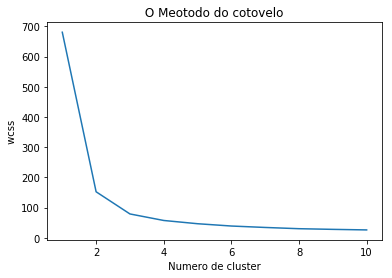

In [39]:
melhor_k(x)

In [36]:
# Applying kemans to dataser / creating kemans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [31]:
def visualizar_clusters(kmeans, y_kmeans):

    plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
    plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
    plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='yellow', label='Iris-virginica')

    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='green', label='Centroides')
    plt.legend()
    plt.show()


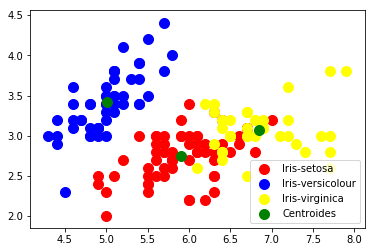

In [37]:
#print(' visualizando os clusters')
visualizar_clusters(kmeans, y_kmeans)


In [40]:
# melhorando os dados
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # padronizar as caracateristicas

[600.0, 223.73200573676343, 140.96581663074699, 114.68221609937966, 91.19197002146464, 80.19300510158155, 71.30070564118623, 62.45268372832477, 54.31087378179731, 47.61654626377584]


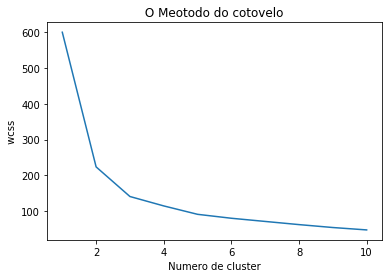

In [41]:
melhor_k(x)

In [42]:
# Applying kemans to dataser / creating kemans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

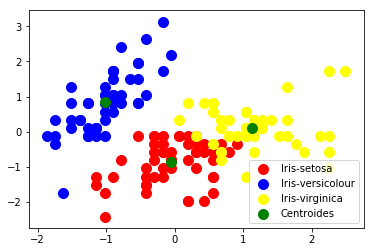

In [43]:
#print(' visualizando os clusters')
visualizar_clusters(kmeans, y_kmeans)
